In [1]:
import os
import pandas as pd

def load_data(directory):
    data = []
    for label in ['pos', 'neg']:
        labeled_dir = os.path.join(directory, label)
        for filename in os.listdir(labeled_dir):
            if filename.endswith(".txt"):
                with open(os.path.join(labeled_dir, filename), 'r', encoding='utf-8') as file:
                    review = file.read()
                    data.append({
                        'review': review,
                        'sentiment': 1 if label == 'pos' else 0
                    })
    return pd.DataFrame(data)

train_df = load_data('/Users/anapaulavaladez/Desktop/Project 3 Pyrhon/train')
test_df = load_data('/Users/anapaulavaladez/Desktop/Project 3 Pyrhon/test')


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download stopwords
nltk.download('stopwords')
nltk.download('punkt')

import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    words = word_tokenize(text)  # Tokenize words
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return ' '.join(words)

train_df['cleaned_review'] = train_df['review'].apply(preprocess_text)
test_df['cleaned_review'] = test_df['review'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anapaulavaladez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anapaulavaladez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anapaulavaladez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anapaulavaladez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(train_df['cleaned_review'])
X_test_tfidf = tfidf.transform(test_df['cleaned_review'])
y_train = train_df['sentiment']
y_test = test_df['sentiment']


In [6]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)


MultinomialNB()

Accuracy: 0.84604
              precision    recall  f1-score   support

           0       0.84      0.86      0.85     12500
           1       0.86      0.83      0.84     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



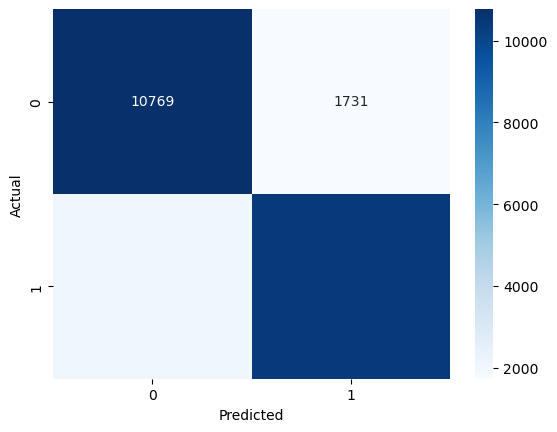

In [7]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [8]:
import joblib

# Save the model
joblib.dump(model, 'movie_review_model.pkl')

# Save the TF-IDF vectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']